In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

date=[]
timetemp=[]
time=[]
height=[]

for arr in a:
	date.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


Text(0, 0.5, 'height')

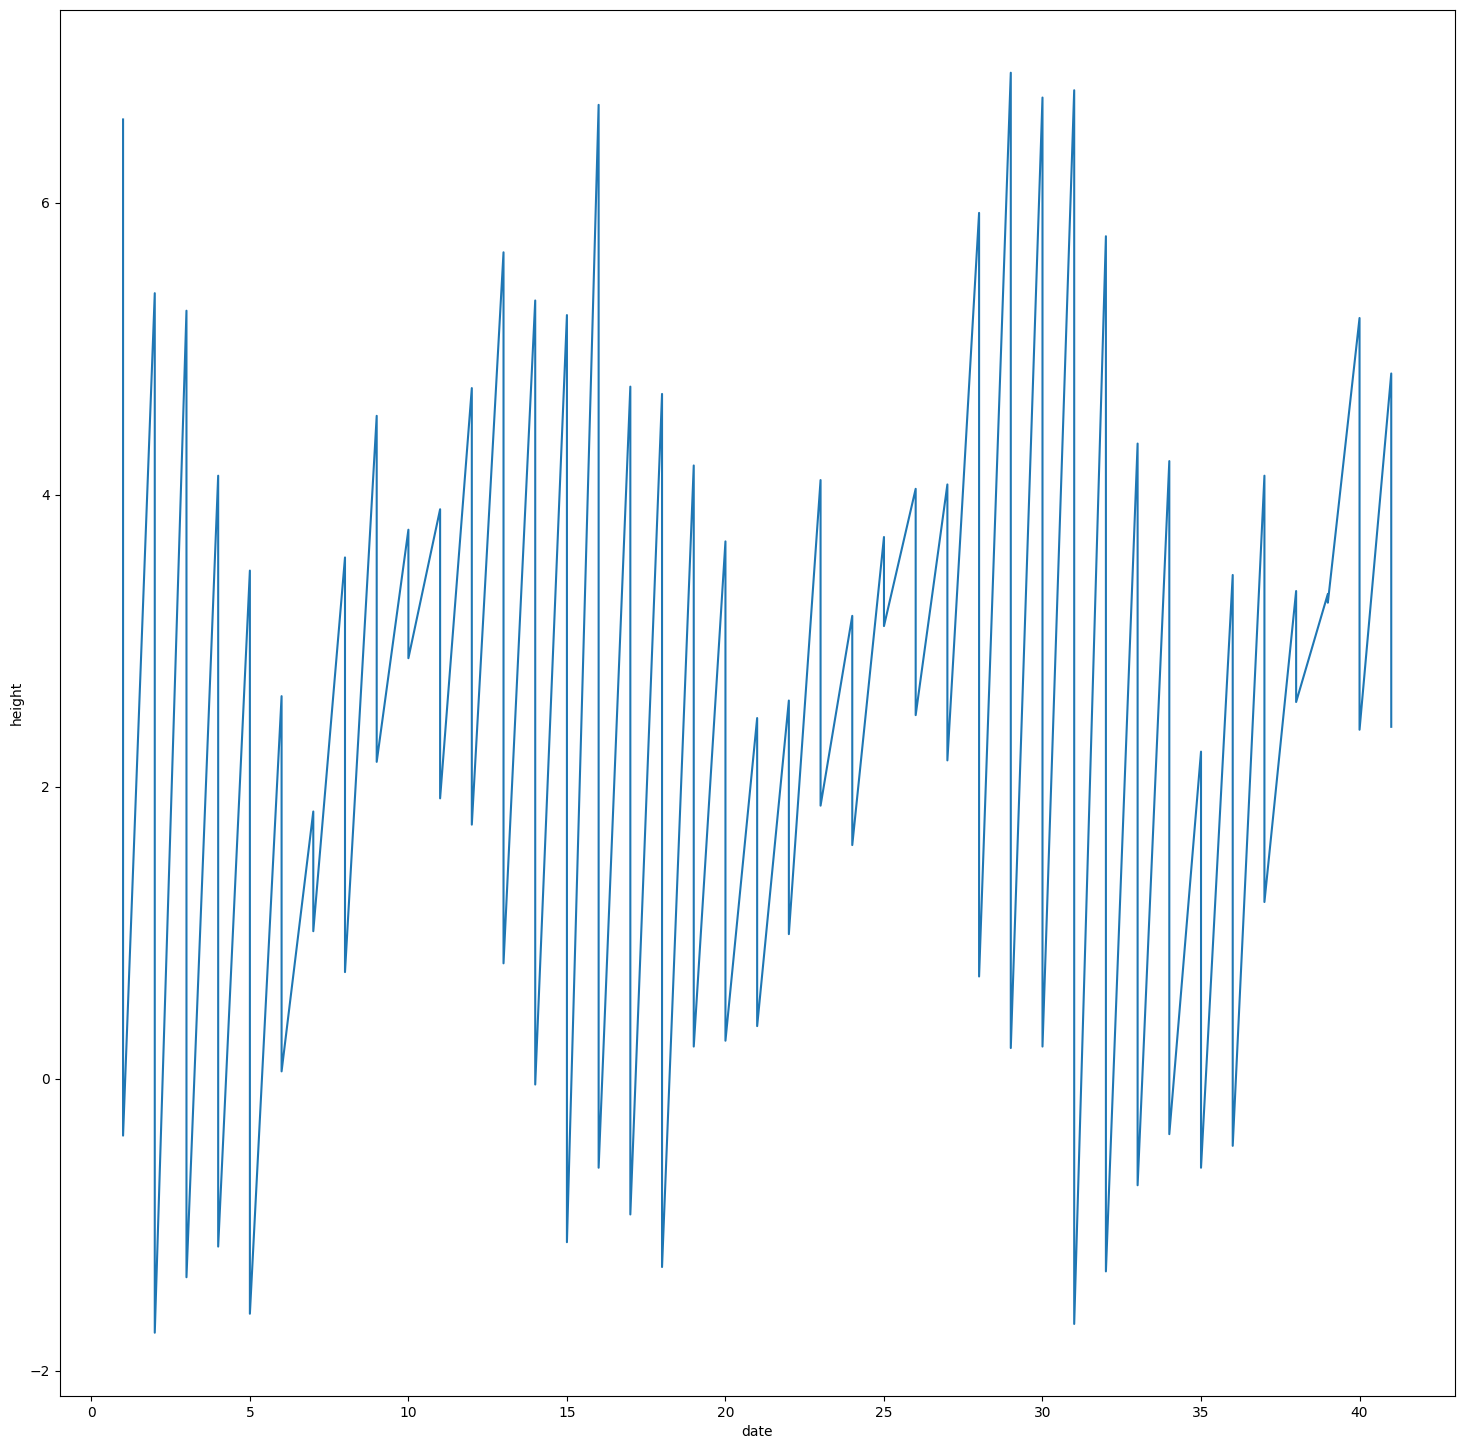

In [11]:
fig = plt.figure(figsize=(18,18),linewidth=3)

plt.plot(date,height)

plt.xlabel('date')
plt.ylabel('height')